House Price Prediction Model
Dataset loaded successfully
Total houses: 545

Model Performance:
R² Accuracy: 0.653 (65.3%)
Average Error: ₹970,043


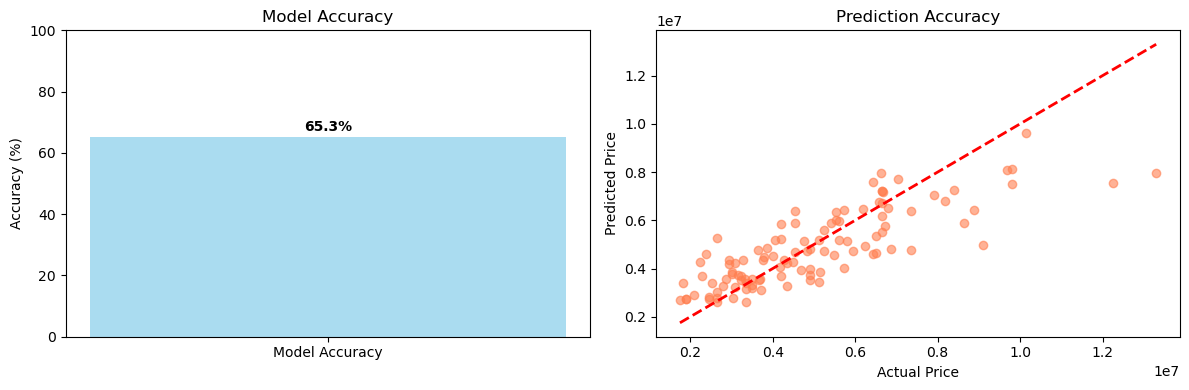


Example Predictions:

House Details:
Area: 6,000 sq ft
Bedrooms: 3
Bathrooms: 2
Stories: 2
Parking: 1
Furnishing: furnished
Predicted Price: ₹6,294,213

House Details:
Area: 4,000 sq ft
Bedrooms: 2
Bathrooms: 1
Stories: 1
Parking: 1
Furnishing: unfurnished
Predicted Price: ₹3,829,930

House Details:
Area: 8,000 sq ft
Bedrooms: 4
Bathrooms: 3
Stories: 3
Parking: 2
Furnishing: semi-furnished
Predicted Price: ₹8,442,810


In [2]:
# Project: House Price Prediction using Linear Regression
# Steps followed in this project:
# 1. Loading Kaggle Housing Price Dataset
# 2. Cleaning and preprocessing data (convert categorical values into numbers)
# 3. Splitting data into training and testing sets
# 4. Training Linear Regression model
# 5. Evaluating model using R² score and Mean Absolute Error
# 6. Visualizing accuracy and predictions with graphs
# 7. Creating a function to predict price for new input values
# 8. Testing the function with example inputs

# importing libraries
import pandas as pd              # pandas:- used for reading and handling datasets
import numpy as np               # numpy:- used for numerical operations
import matplotlib.pyplot as plt  # matplotlib:- used for data visualization
from sklearn.model_selection import train_test_split   # train_test_split():- splits dataset into train and test parts
from sklearn.linear_model import LinearRegression      # LinearRegression():- regression model for prediction
from sklearn.metrics import r2_score, mean_absolute_error  # r2_score():- model accuracy, mean_absolute_error():- avg error
from sklearn.preprocessing import LabelEncoder         # LabelEncoder():- converts categorical yes/no into 0/1
import warnings
warnings.filterwarnings('ignore')  # filterwarnings():- hides warnings for cleaner output

print("House Price Prediction Model")
print("=" * 40)

# dataset path
dataset_path = r'D:\JupyterNoteBook_ML projects\archive\Housing.csv'
try:
    df = pd.read_csv(dataset_path)     # read_csv():- loads dataset from csv file
    print("Dataset loaded successfully")
    print(f"Total houses: {len(df)}")  # len():- gives total rows in dataset
except:
    print("Dataset not found. Check file path.")
    df = None

if df is not None:
    df_clean = df.copy()   # copy():- creates a duplicate DataFrame
    
    # converting yes/no columns into 1/0 using LabelEncoder
    binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
    le = LabelEncoder()  # LabelEncoder():- changes categorical values into numeric form
    for col in binary_cols:
        df_clean[col] = le.fit_transform(df_clean[col])  # fit_transform():- fits and transforms values into 0/1
    
    # converting furnishingstatus into dummy variables (one-hot encoding)
    furnishing_dummies = pd.get_dummies(df_clean['furnishingstatus'], prefix='furnishing')  # get_dummies():- creates dummy columns
    df_clean = pd.concat([df_clean.drop('furnishingstatus', axis=1), furnishing_dummies], axis=1)  # concat():- merges DataFrames
    
    # splitting features and target
    X = df_clean.drop('price', axis=1)  # drop():- removes price column to keep only features
    y = df_clean['price']               # target variable (price)
    
    # dividing into training and testing data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  
    # test_size=0.2 → 20% test data, random_state=42 → reproducibility
    
    # creating and training linear regression model
    model = LinearRegression()   # creating model object
    model.fit(X_train, y_train)  # fit():- trains model on training data
    
    # predicting on test set
    y_pred = model.predict(X_test)  # predict():- predicts values for given input
    
    # calculating accuracy and error
    accuracy = r2_score(y_test, y_pred)        # r2_score():- returns accuracy score of model
    mae = mean_absolute_error(y_test, y_pred)  # mean_absolute_error():- gives average error
    
    print("\nModel Performance:")
    print(f"R² Accuracy: {accuracy:.3f} ({accuracy*100:.1f}%)")
    print(f"Average Error: ₹{mae:,.0f}")
    
    # plotting results
    plt.figure(figsize=(12, 4))  # figure():- creates new figure with size
    
    # bar chart showing accuracy
    plt.subplot(1, 2, 1)  # subplot():- divides figure into grid (1 row, 2 cols, first plot)
    plt.bar(['Model Accuracy'], [accuracy*100], color='skyblue', alpha=0.7)  # bar():- creates bar chart
    plt.title('Model Accuracy')  # title():- sets chart title
    plt.ylabel('Accuracy (%)')   # ylabel():- sets y-axis label
    plt.ylim(0, 100)             # ylim():- sets y-axis range
    plt.text(0, accuracy*100 + 2, f'{accuracy*100:.1f}%', ha='center', fontweight='bold')  # text(): adds text on chart
    
    # scatter plot showing actual vs predicted prices
    plt.subplot(1, 2, 2)  # second plot in same figure
    plt.scatter(y_test, y_pred, alpha=0.6, color='coral')  # scatter():- creates scatter plot
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # plot():- draws reference line y=x
    plt.xlabel('Actual Price')  # xlabel():- sets x-axis label
    plt.ylabel('Predicted Price')  # ylabel():- sets y-axis label
    plt.title('Prediction Accuracy')  # title():- sets chart title
    
    plt.tight_layout()  # tight_layout():- adjusts spacing between subplots
    plt.show()          # show():- displays all plots
    
    # function for predicting price of new house
    def predict_house_price(area, bedrooms, bathrooms, stories, parking, furnishing='semi-furnished'):
        input_data = X_train.iloc[0:1].copy()  # iloc():- selects rows by index, copy():- keeps structure same
        
        # setting input values
        input_data['area'] = area
        input_data['bedrooms'] = bedrooms
        input_data['bathrooms'] = bathrooms
        input_data['stories'] = stories
        input_data['parking'] = parking
        
        # setting furnishing type as dummy values
        input_data['furnishing_furnished'] = 1 if furnishing == 'furnished' else 0
        input_data['furnishing_semi-furnished'] = 1 if furnishing == 'semi-furnished' else 0
        input_data['furnishing_unfurnished'] = 1 if furnishing == 'unfurnished' else 0
        
        predicted_price = model.predict(input_data)[0]  # predict():- returns predicted value for given input
        
        # printing results
        print("\nHouse Details:")
        print(f"Area: {area:,} sq ft")
        print(f"Bedrooms: {bedrooms}")
        print(f"Bathrooms: {bathrooms}")
        print(f"Stories: {stories}")
        print(f"Parking: {parking}")
        print(f"Furnishing: {furnishing}")
        print(f"Predicted Price: ₹{predicted_price:,.0f}")
        
        return predicted_price  # return():- sends predicted value back to caller

    # testing the function with sample inputs
    print("\nExample Predictions:")
    print("=" * 40)
    
    predict_house_price(6000, 3, 2, 2, 1, 'furnished')      # example call 1
    predict_house_price(4000, 2, 1, 1, 1, 'unfurnished')    # example call 2
    predict_house_price(8000, 4, 3, 3, 2, 'semi-furnished') # example call 3

else:
    print("Cannot proceed without dataset.")

# CLEANER COMMENTED-OUT CODE VERSION (WITHOUT EXTRA COMMENTS)

# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import r2_score, mean_absolute_error
# from sklearn.preprocessing import LabelEncoder
# import warnings
# warnings.filterwarnings('ignore')

# print("House Price Prediction Model")
# print("=" * 40)

# dataset_path = r'D:\JupyterNoteBook_ML projects\archive\Housing.csv'
# try:
#     df = pd.read_csv(dataset_path)
#     print("Dataset loaded successfully")
#     print(f"Total houses: {len(df)}")
# except:
#     print("Dataset not found. Check file path.")
#     df = None

# if df is not None:
#     df_clean = df.copy()
    
#     binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
#      le = LabelEncoder()
#      for col in binary_cols:
#          df_clean[col] = le.fit_transform(df_clean[col])
    
    # furnishing_dummies = pd.get_dummies(df_clean['furnishingstatus'], prefix='furnishing')
    # df_clean = pd.concat([df_clean.drop('furnishingstatus', axis=1), furnishing_dummies], axis=1)
    
    # X = df_clean.drop('price', axis=1)
    # y = df_clean['price']
    
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # model = LinearRegression()
    # model.fit(X_train, y_train)
    
    # y_pred = model.predict(X_test)
    
    # accuracy = r2_score(y_test, y_pred)
    # mae = mean_absolute_error(y_test, y_pred)
    
    # print("\nModel Performance:")
    # print(f"R² Accuracy: {accuracy:.3f} ({accuracy*100:.1f}%)")
    # print(f"Average Error: ₹{mae:,.0f}")
    
    # plt.figure(figsize=(12, 4))
    
    # plt.subplot(1, 2, 1)
    # plt.bar(['Model Accuracy'], [accuracy*100], color='skyblue', alpha=0.7)
    # plt.title('Model Accuracy')
    # plt.ylabel('Accuracy (%)')
    # plt.ylim(0, 100)
    # plt.text(0, accuracy*100 + 2, f'{accuracy*100:.1f}%', ha='center', fontweight='bold')
    
    # plt.subplot(1, 2, 2)
    # plt.scatter(y_test, y_pred, alpha=0.6, color='coral')
    # plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    # plt.xlabel('Actual Price')
    # plt.ylabel('Predicted Price')
    # plt.title('Prediction Accuracy')
    
    # plt.tight_layout()
    # plt.show()
    
    # def predict_house_price(area, bedrooms, bathrooms, stories, parking, furnishing='semi-furnished'):
    #     input_data = X_train.iloc[0:1].copy()
        
    #     input_data['area'] = area
    #     input_data['bedrooms'] = bedrooms
    #     input_data['bathrooms'] = bathrooms
    #     input_data['stories'] = stories
    #     input_data['parking'] = parking
        
    #     input_data['furnishing_furnished'] = 1 if furnishing == 'furnished' else 0
    #     input_data['furnishing_semi-furnished'] = 1 if furnishing == 'semi-furnished' else 0
    #     input_data['furnishing_unfurnished'] = 1 if furnishing == 'unfurnished' else 0
        
    #     predicted_price = model.predict(input_data)[0]
        
#         print("\nHouse Details:")
#         print(f"Area: {area:,} sq ft")
#         print(f"Bedrooms: {bedrooms}")
#         print(f"Bathrooms: {bathrooms}")
#         print(f"Stories: {stories}")
#         print(f"Parking: {parking}")
#         print(f"Furnishing: {furnishing}")
#         print(f"Predicted Price: ₹{predicted_price:,.0f}")
        
#         return predicted_price

#     print("\nExample Predictions:")
#     print("=" * 40)
    
#     predict_house_price(6000, 3, 2, 2, 1, 'furnished')
#     predict_house_price(4000, 2, 1, 1, 1, 'unfurnished')
#     predict_house_price(8000, 4, 3, 3, 2, 'semi-furnished')

# else:
#     print("Cannot proceed without dataset.")

